## Perform sentimental analysis:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [ ]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## 2. Multi-page web-scraping

In [ ]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

### Looping through multiple pages

In [ ]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [ ]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

### Save results to a Dataframe, then export as CSV

In [ ]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,Reviewed in India on 17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
4,4.0 out of 5 stars\nbeautiful very nice...miss...,4.0,beautiful very nice...missing body temperature...,Reviewed in India on 13 September 2023
5,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,Reviewed in India on 16 December 2021
6,4.0 out of 5 stars\nBlood pressure measuring o...,4.0,The product working goodBut the blood pressure...,Reviewed in India on 17 September 2023
7,4.0 out of 5 stars\nBest buy,4.0,Its been 1 year i buy this watch and i can say...,Reviewed in India on 21 September 2023
8,4.0 out of 5 stars\nSmart Watches,4.0,Pros:Good battery lifeFunctional featuresReaso...,Reviewed in India on 23 September 2023
9,4.0 out of 5 stars\nPretty long lasting,4.0,"Runs for 5-6 days. Works as expected, waterproof.",Reviewed in India on 25 September 2023


In [ ]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [ ]:
df.head(50)

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
4,4.0 out of 5 stars\nbeautiful very nice...miss...,4.0,beautiful very nice...missing body temperature...,13 September 2023
5,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
6,4.0 out of 5 stars\nBlood pressure measuring o...,4.0,The product working goodBut the blood pressure...,17 September 2023
7,4.0 out of 5 stars\nBest buy,4.0,Its been 1 year i buy this watch and i can say...,21 September 2023
8,4.0 out of 5 stars\nSmart Watches,4.0,Pros:Good battery lifeFunctional featuresReaso...,23 September 2023
9,4.0 out of 5 stars\nPretty long lasting,4.0,"Runs for 5-6 days. Works as expected, waterproof.",25 September 2023


In [ ]:
df.to_csv("BoatSmartWatch_Review.csv")

## 3. Load Dataset

In [ ]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
4,4.0 out of 5 stars\nbeautiful very nice...miss...,4.0,beautiful very nice...missing body temperature...,13 September 2023
5,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
6,4.0 out of 5 stars\nBlood pressure measuring o...,4.0,The product working goodBut the blood pressure...,17 September 2023
7,4.0 out of 5 stars\nBest buy,4.0,Its been 1 year i buy this watch and i can say...,21 September 2023
8,4.0 out of 5 stars\nSmart Watches,4.0,Pros:Good battery lifeFunctional featuresReaso...,23 September 2023
9,4.0 out of 5 stars\nPretty long lasting,4.0,"Runs for 5-6 days. Works as expected, waterproof.",25 September 2023


## 4. Data Exploration

In [ ]:
reviews.Rating.describe()

count    10.000000
mean      3.900000
std       0.567646
min       3.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Rating, dtype: float64

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        10 non-null     object 
 1   Rating       10 non-null     float64
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
dtypes: float64(1), object(3)
memory usage: 448.0+ bytes


In [ ]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [ ]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
4,4.0 out of 5 stars\nbeautiful very nice...miss...,4.0,beautiful very nice...missing body temperature...,13 September 2023


## 5. Data Visualization

### Date vs Review Count

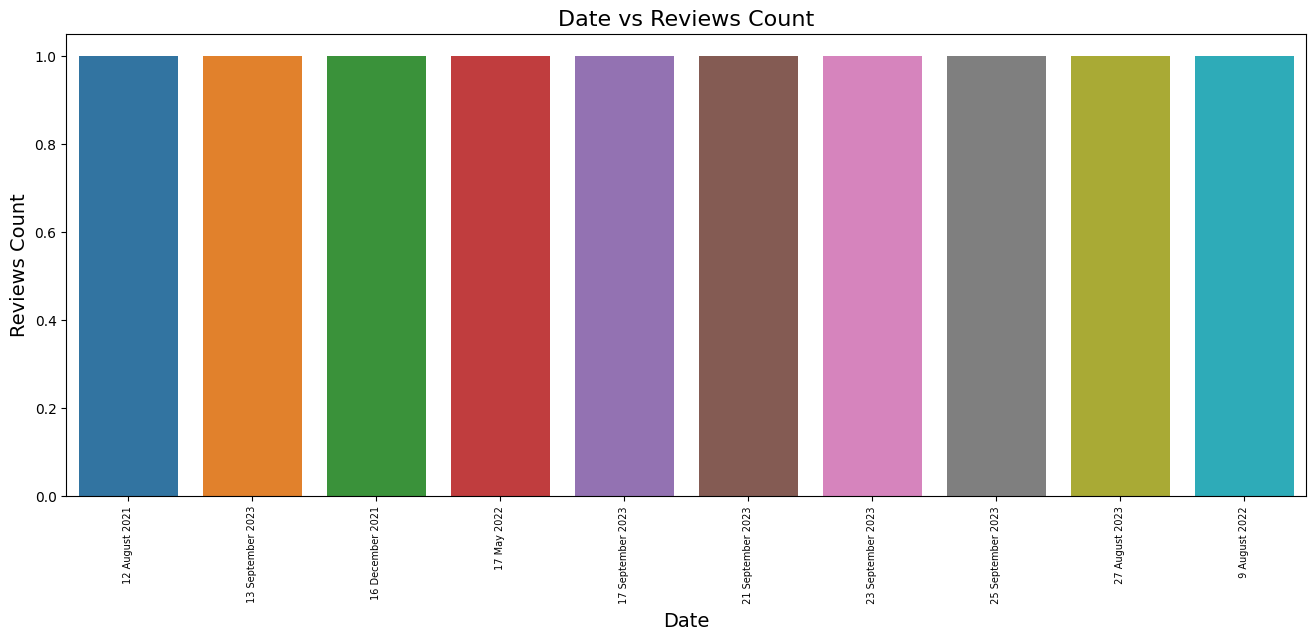

In [ ]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

### Percentage of Ratings

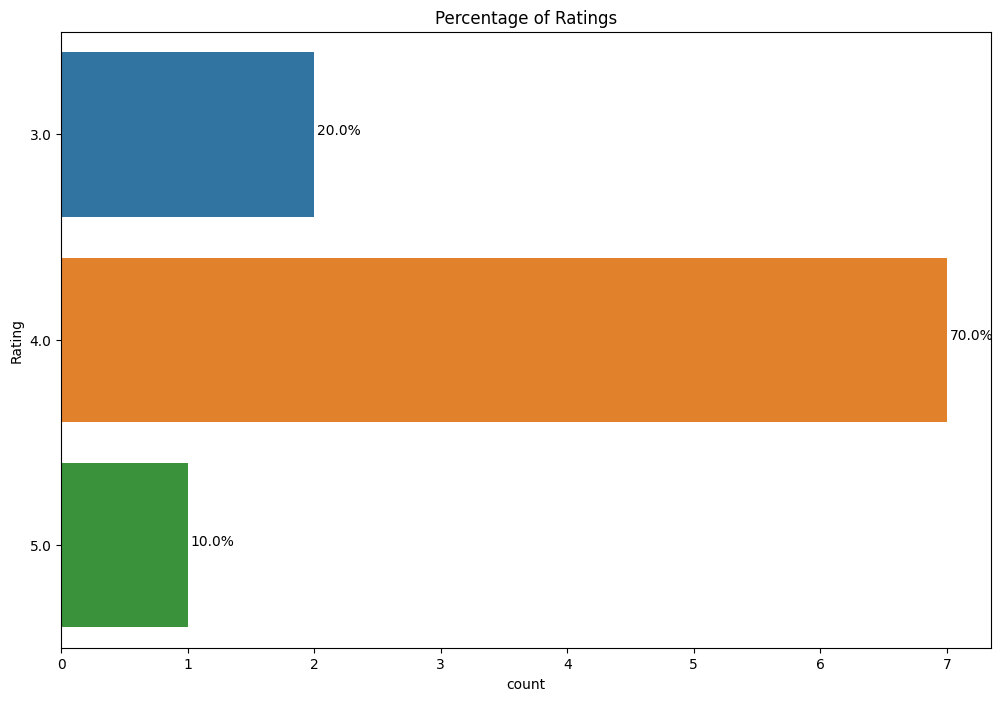

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

## 6. BasicText Preprocessing for Sentiment Analysis

### Spelling Correction

In [ ]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Review OverviewAverage2.The Coat today launche...
1    The media could not be loaded.\n              ...
2    Shipping the parts mostly covered in other rev...
3    His smart (model Coat extend plus) watch is sa...
4    beautiful very nice...missing body temperature...
Name: Review, dtype: object

In [ ]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Review OverviewAverage2.7The Boat today launch...
1,The media could not be loaded.\n ...
2,Skipping the parts mostly covered in other rev...
3,This smart (model Boat extend plus) watch is f...
4,beautiful very nice...missing body temperature...
5,Pros:1. Premium build quality with matte finis...
6,The product working goodBut the blood pressure...
7,Its been 1 year i buy this watch and i can say...
8,Pros:Good battery lifeFunctional featuresReaso...
9,"Runs for 5-6 days. Works as expected, waterproof."


### Resetting index

In [ ]:
boat_review.reset_index(drop=True, inplace=True)

In [ ]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

### Lemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,beautiful nice missing body temperature let se...,beautiful nice...missing body temperature only...


## 7. Text Pre-processing Techniques

### A. Removing '@names'

In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [ ]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,beautiful nice missing body temperature let se...,beautiful nice...missing body temperature only...
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,product working goodbut blood pressure measuri...,the product working goodbut blood pressure mea...
7,year buy watch say best buy problem occurs til...,its 1 year buy watch say best buy me.... no pr...
8,pro good battery lifefunctional featuresreason...,pros:good battery lifefunctional featuresreaso...
9,run day work expected waterproof,"runs 5-6 days. works expected, waterproof."


### B. Removing links (http | https)

In [ ]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,beautiful nice missing body temperature let se...,beautiful nice...missing body temperature only...
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,product working goodbut blood pressure measuri...,the product working goodbut blood pressure mea...
7,year buy watch say best buy problem occurs til...,its 1 year buy watch say best buy me.... no pr...
8,pro good battery lifefunctional featuresreason...,pros:good battery lifefunctional featuresreaso...
9,run day work expected waterproof,"runs 5-6 days. works expected, waterproof."


### C. Removing Review with empty text

In [ ]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,beautiful nice missing body temperature let se...,beautiful nice...missing body temperature only...
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,product working goodbut blood pressure measuri...,the product working goodbut blood pressure mea...
7,year buy watch say best buy problem occurs til...,its 1 year buy watch say best buy me.... no pr...
8,pro good battery lifefunctional featuresreason...,pros:good battery lifefunctional featuresreaso...
9,run day work expected waterproof,"runs 5-6 days. works expected, waterproof."


### D. Dropping duplicate rows

In [ ]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,beautiful nice missing body temperature let se...,beautiful nice...missing body temperature only...
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,product working goodbut blood pressure measuri...,the product working goodbut blood pressure mea...
7,year buy watch say best buy problem occurs til...,its 1 year buy watch say best buy me.... no pr...
8,pro good battery lifefunctional featuresreason...,pros:good battery lifefunctional featuresreaso...
9,run day work expected waterproof,"runs 5-6 days. works expected, waterproof."


### E. Function to remove emoji

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,beautiful nice missing body temperature let se...,beautiful nice...missing body temperature only...
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,product working goodbut blood pressure measuri...,the product working goodbut blood pressure mea...
7,year buy watch say best buy problem occurs til...,its 1 year buy watch say best buy me.... no pr...
8,pro good battery lifefunctional featuresreason...,pros:good battery lifefunctional featuresreaso...
9,run day work expected waterproof,"runs 5-6 days. works expected, waterproof."


### F. Removing Stop words

In [ ]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [ ]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [ ]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
4,beautiful nice missing body temperature let se...,beautiful nice...missing body temperature only...
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
6,product working goodbut blood pressure measuri...,the product working goodbut blood pressure mea...
7,year buy watch say best buy problem occurs til...,its 1 year buy watch say best buy me.... no pr...
8,pro good battery lifefunctional featuresreason...,pros:good battery lifefunctional featuresreaso...
9,run day work expected waterproof,"runs 5-6 days. works expected, waterproof."


### G. Tokenize 'Clean_Reviews'

In [ ]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'used', 'watch', 'month', 'bought', 'first', 'sale', 'keep', 'reading', 'unbiased', 'review', 'tip', 'trick', 'ensure', 'function', 'watch', 'working', 'smoothly', 'large', 'curved', 'display', 'price', 'category', 'inch', 'battery', 'heavy', 'usage', 'frequently', 'waking', 'screen', 'alexa', 'alarm', 'notification', 'day', 'standby', 'checking', 'time', 'occassionally', 'day', 'pretty', 'good', 'full', 'charging', 'time', 'hour', 'decent', 'quality', 'magnetic', 'charging', 'cable', 'provided', 'use', 'low', 'power', 'adapter', 'power', 'bank', 'laptop', 'necessary', 'health', 'workout', 'tracking', 'option', 'spo', 'oxymeter', 'heart', 'rate', 'monitor', 'accuracy', 'sleep', 'tracking', 'pretty', 'accurate', 'paedometer', 'accurate', 'time', 'sometimes', 'hundred', 'step', 'added', 'randomly', 'without', 'activity', 'happens', 'randomly', 'day', 'stress', 'monitor', 'also', 'sure', 'calculated', 'sensor', 'fake', 'probably', 'watch', 'contact',

In [ ]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [review, overviewaverage, boat, today, launche...
1    [medium, could, loaded, used, watch, month, bo...
2    [skipping, part, mostly, covered, review, spon...
3    [smart, model, boat, extend, plus, watch, func...
4    [beautiful, nice, missing, body, temperature, ...
5    [pro, premium, build, quality, matte, finishin...
6    [product, working, goodbut, blood, pressure, m...
7    [year, buy, watch, say, best, buy, problem, oc...
8    [pro, good, battery, lifefunctional, featuresr...
9               [run, day, work, expected, waterproof]
Name: Clean_Reviews, dtype: object

In [ ]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
4,beautiful nice missing body temperature let se...,beautiful nice...missing body temperature only...,"[beautiful, nice, missing, body, temperature, ..."
5,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."
6,product working goodbut blood pressure measuri...,the product working goodbut blood pressure mea...,"[product, working, goodbut, blood, pressure, m..."
7,year buy watch say best buy problem occurs til...,its 1 year buy watch say best buy me.... no pr...,"[year, buy, watch, say, best, buy, problem, oc..."
8,pro good battery lifefunctional featuresreason...,pros:good battery lifefunctional featuresreaso...,"[pro, good, battery, lifefunctional, featuresr..."
9,run day work expected waterproof,"runs 5-6 days. works expected, waterproof.","[run, day, work, expected, waterproof]"


### H. Converting words to Stemmer

In [ ]:
stemmer = SnowballStemmer("english")

In [ ]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,review overviewaverag boat today launch boat x...
1,medium could load use watch month bought first...
2,skip part most cover review sponsor yt one add...
3,smart model boat extend plus watch function we...
4,beauti nice miss bodi temperatur let see durab...
5,pro premium build qualiti matt finish sturdi p...
6,product work goodbut blood pressur measur opti...
7,year buy watch say best buy problem occur till...
8,pro good batteri lifefunct featuresreason good...
9,run day work expect waterproof


### I. Converting words to Lemma

In [ ]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,review overviewaverage boat today launched boa...
1,medium could loaded used watch month bought fi...
2,skipping part mostly covered review sponsored ...
3,smart model boat extend plus watch functioning...
4,beautiful nice missing body temperature let se...
5,pro premium build quality matte finishing stur...
6,product working goodbut blood pressure measuri...
7,year buy watch say best buy problem occurs til...
8,pro good battery lifefunctional featuresreason...
9,run day work expected waterproof


## 8. Basic Feature Extaction
### A. Applying bag of Words without N grams

In [ ]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [ ]:
print(cv.get_feature_names_out()[109:200])

['breath' 'breathing' 'bright' 'brightness' 'brings' 'browsing' 'brushed'
 'bt' 'budget' 'bug' 'build' 'buildi' 'built' 'bulb' 'burnt' 'button'
 'buy' 'buying' 'cable' 'cache' 'calculated' 'calculation' 'calculator'
 'calender' 'call' 'called' 'caller' 'calling' 'calorie' 'calory' 'cals'
 'camera' 'cannot' 'carddesign' 'care' 'case' 'category' 'center'
 'centerbefore' 'change' 'changed' 'charge' 'charger' 'charging' 'charm'
 'cheap' 'check' 'checked' 'checking' 'childish' 'chinese' 'choice'
 'claim' 'claimed' 'classic' 'clean' 'clear' 'clearing' 'clearly' 'click'
 'clipuser' 'clone' 'close' 'cloud' 'color' 'colour' 'colourcharging'
 'combi' 'come' 'comfortable' 'comfortdisplaywatch' 'comfortwhen' 'coming'
 'command' 'common' 'company' 'compared' 'complain' 'complaining'
 'completely' 'con' 'condition' 'configuration' 'configure' 'connect'
 'connected' 'connecting' 'connectivity' 'connects' 'considerably'
 'consmusic']


In [ ]:
print(cv.get_feature_names_out()[:100])

['absolutely' 'ac' 'accept' 'acceptable' 'acceptance' 'accepts' 'access'
 'accidentally' 'account' 'accuracy' 'accuracybatteryyou'
 'accuracycomparing' 'accurate' 'accurately' 'activate' 'activating'
 'active' 'activites' 'activity' 'actual' 'actually' 'adapter' 'add'
 'added' 'addition' 'adjust' 'advertised' 'aggregate' 'alarm' 'alert'
 'alexa' 'allowed' 'also' 'aluminium' 'always' 'amazfit' 'amazon'
 'amazoni' 'amezonother' 'amoled' 'amount' 'analog' 'android' 'angle'
 'animal' 'animation' 'anniversary' 'another' 'answer' 'anyonefor'
 'anything' 'anywhere' 'aod' 'apart' 'app' 'appaccuracyaccuracy'
 'appaccuracybatteryfinal' 'apple' 'apps' 'appyou' 'around' 'aside' 'asks'
 'aspect' 'assistant' 'assisted' 'atm' 'attached' 'attaching' 'attention'
 'attractive' 'audio' 'auto' 'available' 'average' 'away' 'back'
 'background' 'badge' 'band' 'bank' 'bar' 'based' 'basic' 'bathing'
 'battery' 'beautiful' 'bed' 'beginning' 'believe' 'best' 'better'
 'beyond' 'bezel' 'big' 'bike' 'bip' 'bit' '

In [ ]:
print(tweetscv.toarray()[100:200])

[]


### B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [ ]:
dataframe = dataframe.reset_index(drop=True)

In [ ]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
corpus[3]

'smart model boat extend plu watch function well worth price r batteri begin last day next charg last day last settl one day extens user app amol display good touch featur good access app easili reachabl simpl brows featur sleep measur good take day time nap night time show exactli went sleep woke spo measur neaarer measur person digit instrument heart rate measur also nearer instrument stress also reflect nearli real condit activ step show correct distanc also good watch take bike ride walk show distanc cover set target sport featur check yet fulli check featur function water resist ye water resist check bath drizzl rain time display good number display avail cloud suffici alway featur work model avail featur pleas could skin made avail display wrist put rest rais respect featur function featur alway enabl otherwis function bluetooth call featur good speaker loud enough take call use listen audio video walk ofcours batteri drain quickli messag ye good see notif flash light function ok

### Applying Countvectorizer (Creating the Bag of Words model)

In [ ]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(10, 1546)

In [ ]:
cv.get_feature_names_out()[:20]

array(['accept', 'access', 'accur', 'accuraci', 'accuraci sleep',
       'accuraci sleep track', 'activ', 'activ step', 'actual', 'ad',
       'add', 'alarm', 'alarm timer', 'alert', 'alexa', 'alexa support',
       'alexa watch', 'alexa work', 'also', 'also good'], dtype=object)

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,accept,access,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ step,actual,ad,...,worth,would,would recommend,would recommend go,wrist,wud,xtend,xtend smartwatch,xtend watch,ye
0,0,1,4,3,0,0,1,0,0,1,...,1,4,2,2,0,0,20,7,1,1
1,0,0,3,1,1,1,3,0,1,2,...,0,0,0,0,0,0,1,0,1,1
2,1,1,0,1,0,0,6,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
5,3,0,3,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### C. TF-IDF Vectorizer

In [ ]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
corpus[4]

'beauti nice miss bodi temperatur let see durabl futureand support boat custom care servic centerbefor bought firebolt mercuryit day work never support fireboltt custom care servic center think boat better choic firebolt never ever wud buy firebolt never ever wud suggest anyonefor firebolt'

### Applying TF-IDF Vectorizer

In [ ]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [ ]:
X.shape

(10, 1546)

In [ ]:
tfidf_v.get_feature_names_out()[:20]

array(['accept', 'access', 'accur', 'accuraci', 'accuraci sleep',
       'accuraci sleep track', 'activ', 'activ step', 'actual', 'ad',
       'add', 'alarm', 'alarm timer', 'alert', 'alexa', 'alexa support',
       'alexa watch', 'alexa work', 'also', 'also good'], dtype=object)

In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,accept,access,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ step,actual,ad,...,worth,would,would recommend,would recommend go,wrist,wud,xtend,xtend smartwatch,xtend watch,ye
0,0.000000,0.012678,0.050712,0.033815,0.000000,0.000000,0.011272,0.000000,0.000000,0.014491,...,0.014491,0.068186,0.034093,0.034093,0.000000,0.000000,0.289821,0.119325,0.014491,0.012678
1,0.000000,0.000000,0.069993,0.020743,0.026668,0.026668,0.062229,0.000000,0.023331,0.053335,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026668,0.000000,0.026668,0.023331
2,0.028118,0.024600,0.000000,0.021871,0.000000,0.000000,0.131229,0.028118,0.024600,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.024600,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.035787,0.000000,0.000000,0.000000,0.000000,0.031817,0.040905,0.000000,0.000000,...,0.040905,0.000000,0.000000,0.000000,0.035787,0.000000,0.000000,0.000000,0.000000,0.071574
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.203106,0.000000,0.000000,0.000000,0.000000
5,0.089148,0.000000,0.077994,0.023114,0.029716,0.029716,0.000000,0.000000,0.025998,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.025998,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### D. Named Entity Recognition (NER)

In [ ]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'review overviewaverage boat today launched boat xtend company latest budget smartwatch price tag r boat xtend smartwatch come stylish design resembling apple watch moreover built amazon alexa support spo tracking stress tracking much coming budget segment worth buy smartwatch query nothing worry detailed review boat xtend smartwatch clear doubt contentsbox contentdesign build comfortdisplaywatch ui featuresalexa supportwatch facesboat wave appaccuracybatteryfinal wordsbuy box contentboat xtend box contentsmartwatch black gold colourcharging clipuser manual warranty carddesign build comfortwhen buying smartwatch one always think design look apart feature design build another major aspect one take care buying smartwatch boat worked design time brings premium side term look design inspired apple watch cannot compared obviously every aspect apple watch would much better boat xtend smartwatch redmi watch well amazfit bip u pro shape design build quality much premium one boat xtend design b

### Parts Of Speech (POS) Tagging

In [ ]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[:50]:
    print(token,token.pos_)

review NOUN
overviewaverage NOUN
boat NOUN
today NOUN
launched VERB
boat NOUN
xtend NOUN
company NOUN
latest ADJ
budget NOUN
smartwatch NOUN
price NOUN
tag NOUN
r NOUN
boat NOUN
xtend NOUN
smartwatch NOUN
come VERB
stylish ADJ
design NOUN
resembling VERB
apple NOUN
watch NOUN
moreover ADV
built VERB
amazon PROPN
alexa ADJ
support NOUN
spo NOUN
tracking VERB
stress NOUN
tracking VERB
much ADJ
coming VERB
budget NOUN
segment NOUN
worth ADJ
buy VERB
smartwatch NOUN
query NOUN
nothing PRON
worry VERB
detailed ADJ
review NOUN
boat NOUN
xtend NOUN
smartwatch NOUN
clear ADJ
doubt PROPN
contentsbox PROPN


### Filtering the nouns and verbs only

In [ ]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['believe', 'gold', 'color', 'fade', 'time', 'color', 'variant', 'look', 'one', 'opinion', 'color', 'scheme', 'find', 'color', 'scheme', 'boat', 'xtend', 'watch', 'water', 'resistance', 'silicon', 'strap', 'strap', 'quality', 'strap', 'find', 'usage', 'displaycoming', 'display', 'watch', 'shape', 'display', 'see', 'panel', 'screen', 'bezel', 'part', 'screen', 'go', 'notice', 'bezel', 'screen', 'quality', 'feel', 'display', 'complain', 'watch', 'offer', 'screen', 'time', 'level', 'brightness', 'control', 'boat', 'xtend', 'display', 'qualityi', 'find', 'display', 'quality', 'boat', 'xtend', 'smartwatch', 'smartwatch', 'boat', 'view', 'angle', 'one', 'see', 'content', 'smartwatch', 'sunlight', 'saturated', 'complain', 'price', 'range', 'watch', 'smartwatch', 'use', 'button', 'watch', 'work', 'power', 'button', 'button', 'display', 'display', 'work', 'problem', 'animation', 'bar', 'menu', 'navigation', 'simple', 'find', 'use', 'watch', 'lag', 'bit', 'company']


### Counting the noun & verb tokens

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,66
1,boat,43
2,time,27
3,day,26
4,feature,25
5,smartwatch,23
6,app,21
7,xtend,20
8,display,20
9,work,19


### Visualizing results (Barchart for top 10 nouns + verbs)

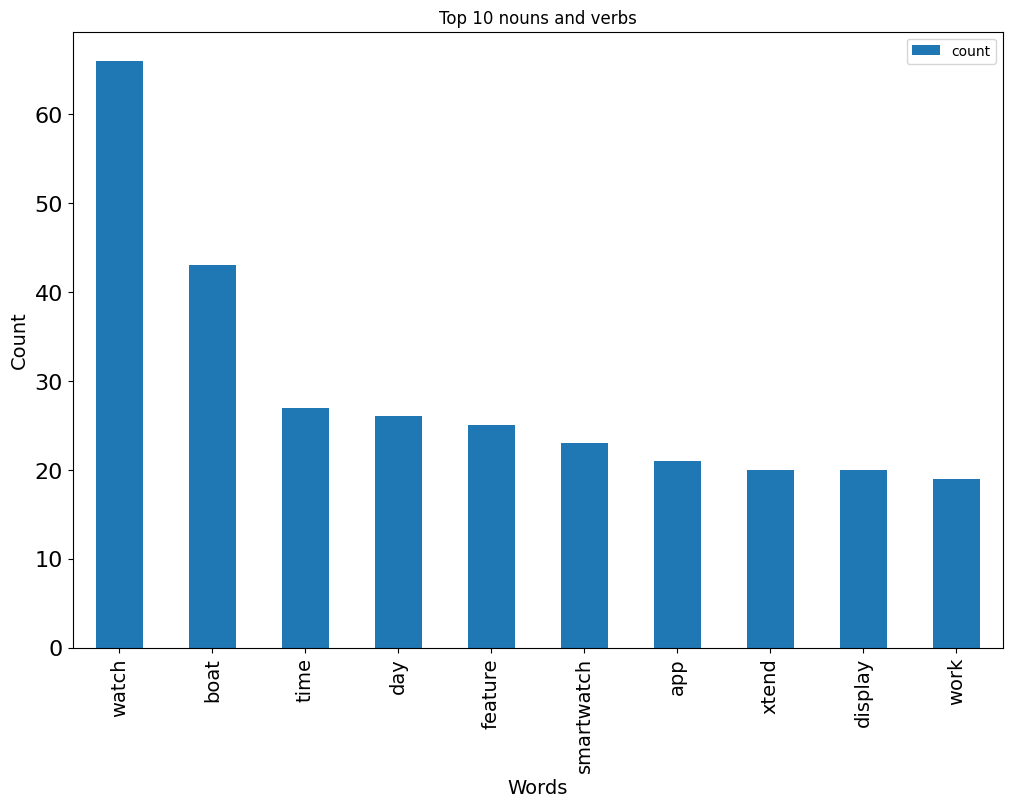

In [ ]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## 9. Feature Extraction

### A. BOW Features

In [ ]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

### B. TF-IDF Features

In [ ]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

## 10. Fetch sentiments Using TextBlob

In [ ]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [ ]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,8
neg,2


###  Let's calculate subjectivity and Polarity

In [ ]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452
4,beautiful nice missing body temperature let se...,beautiful nice...missing body temperature only...,"[beautiful, nice, missing, body, temperature, ...",0.530000,0.330000


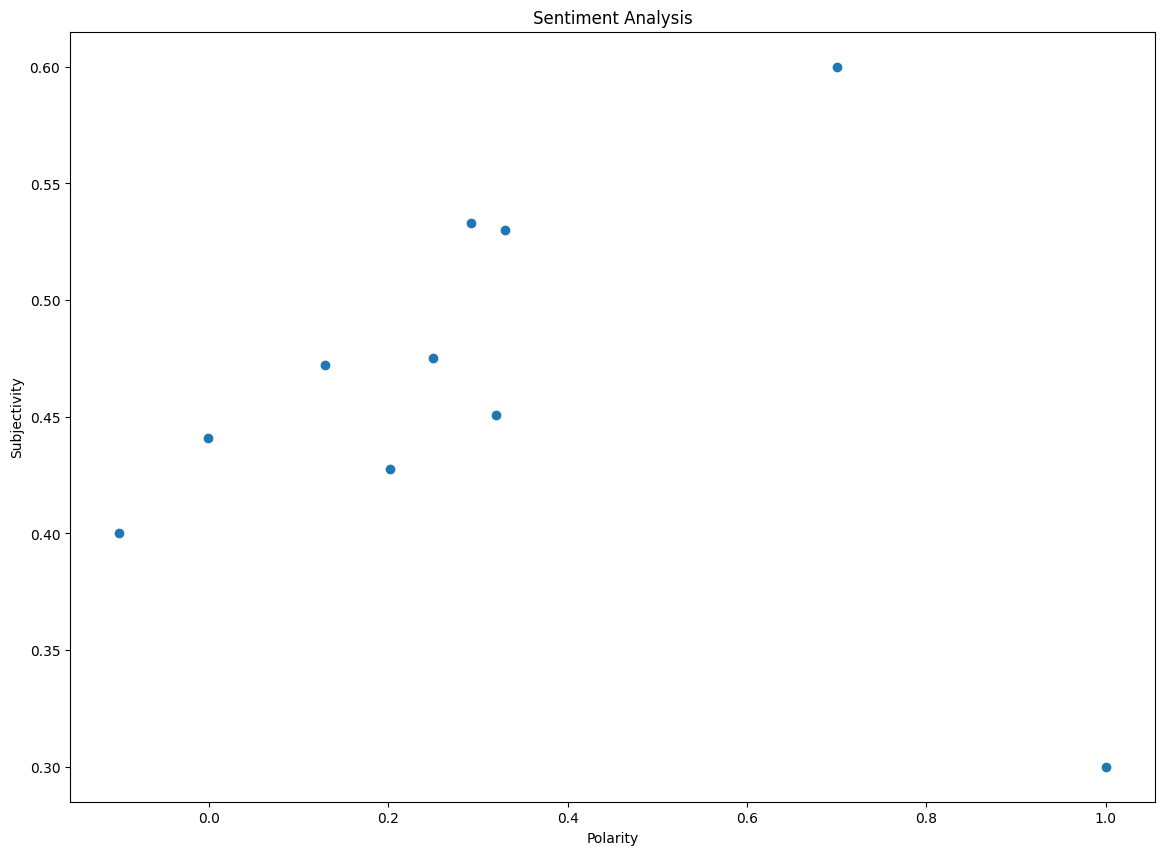

In [ ]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [ ]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche...",0.427641,0.202171,pos
1,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
2,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266,neg
3,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452,pos
4,beautiful nice missing body temperature let se...,beautiful nice...missing body temperature only...,"[beautiful, nice, missing, body, temperature, ...",0.530000,0.330000,pos


## 11. Story Generation and Visualization

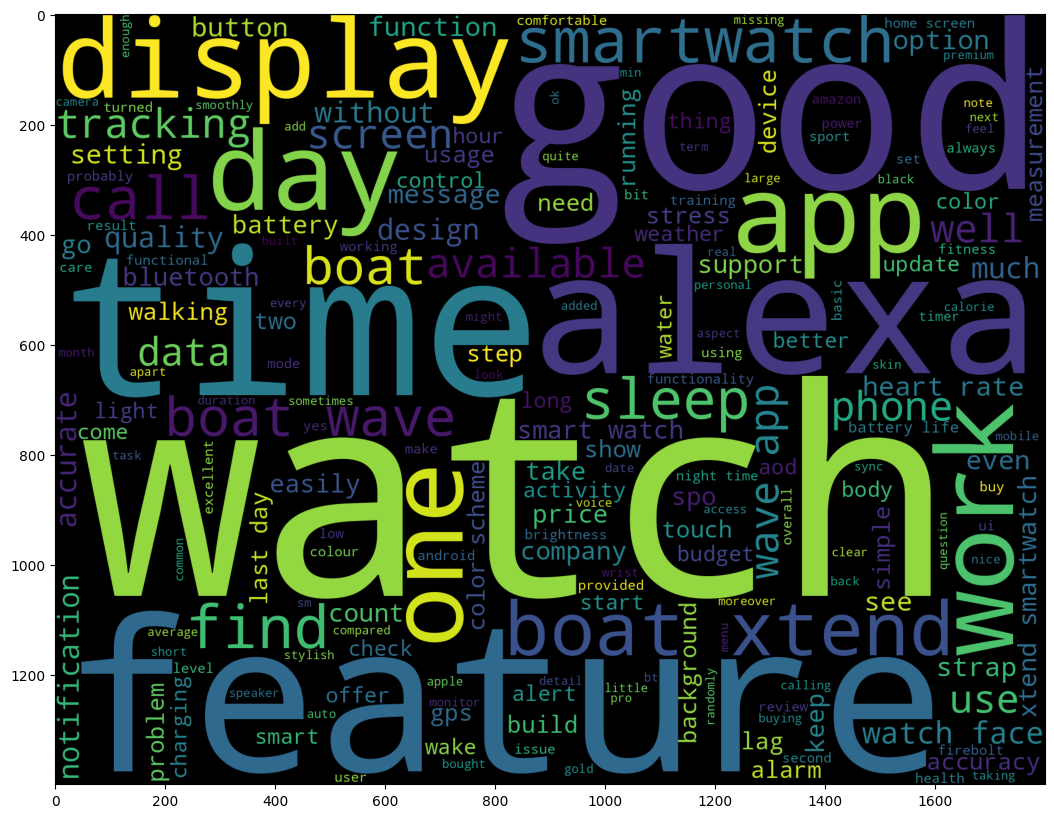

In [ ]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

### A. Most common words in positive Review

In [ ]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

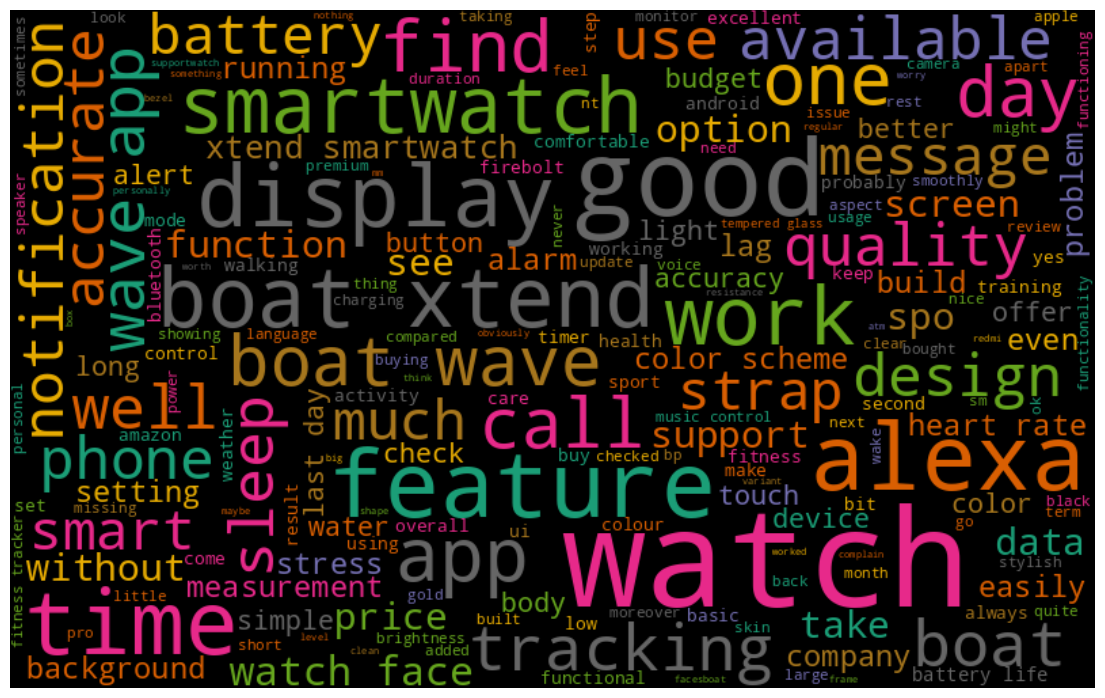

In [ ]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### B. Most common words in negative Review

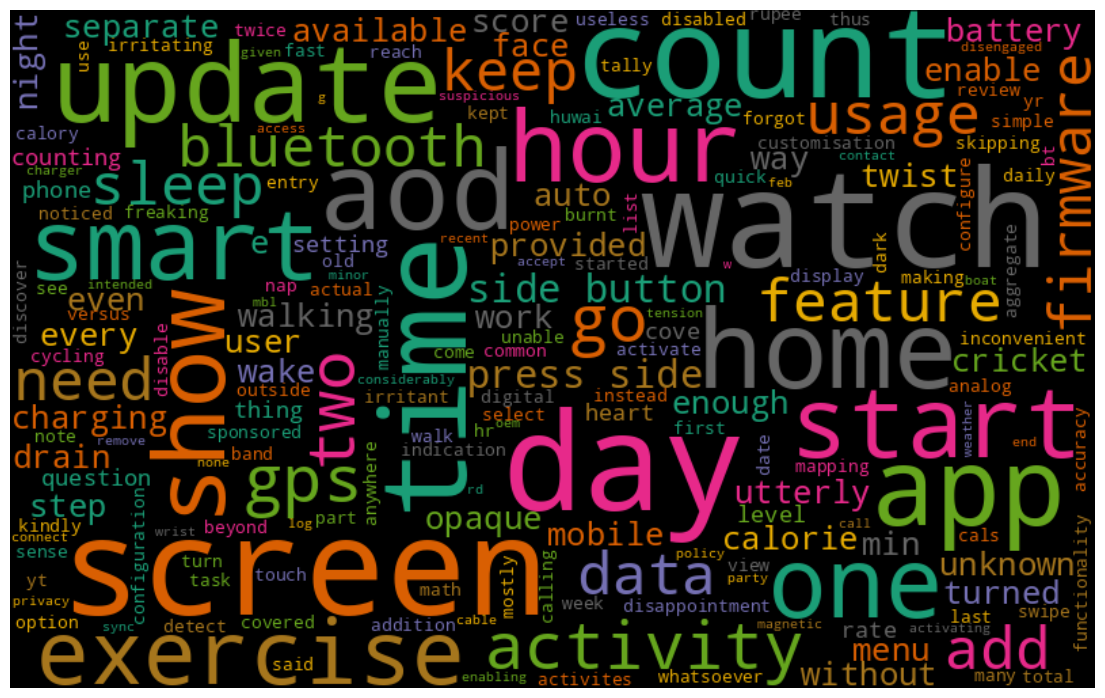

In [ ]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)